In [1]:
import os
root = os.path.join('..', '..')

In [2]:
import sys
sys.path.append(root)

In [3]:
from typing import List, Literal, Sequence, Tuple

import pandas as pd

from utils.fig import Figure

# Global Setting

In [4]:
Figure.set_seaborn_theme()
Figure.set_tex()
Figure.set_high_dpi()

# Data Utils

In [5]:
def read_acc(dataset_name: str) -> Tuple[List[float], List[float]]:
    path = os.path.join(root, 'models', dataset_name, 'version_0', 'metrics.csv')
    df = pd.read_csv(path, usecols=['training_acc', 'val_acc'])
    return df['training_acc'].tolist(), df['val_acc'].tolist()

# Figure Utils

In [6]:
def show_all(names: Sequence[str], labels: Sequence[str]) -> None:
    Figure.set_font_scale(0.8)
    row = len(names) // 2 + len(names) % 2
    f = Figure(row, 2, (6, 1.8*row))

    for i, (n, l) in enumerate(zip(names, labels)):
        ax = f.axes[i//2][i%2]

        train_acc, val_acc = read_acc(n)
        r = range(len(train_acc))
        
        ax.line(r, train_acc, label='Training', linewidth=2)
        ax.line(r, val_acc, label='Validation', linewidth=2)

        ax.set_xlabel('Epoch')
        ax.set_ylabel('Accuracy')
        
        ax.set_ylim(-0.05, 1.05)
        ax.set_yticks([0, 0.1, 0.5, 1.0])
        ax.set_title(l)

        if i != 1:
            ax.remove_legend()

    if len(names) % 2 == 1:
        f.axes[-1][-1].remove()

    f.show()
    f.close()

# Dataset Names for Inputs and Labels for Plots

In [7]:
def get_names_and_labels(dataset_name: Literal['MNIST', 'FMNIST', 'CIFAR10']) -> Tuple[Sequence[str], Sequence[str]]:
    names = [dataset_name]
    labels = ['Standard']

    norms_for_name = ('L0', 'L2', 'Linf')
    norms_for_plot = ('$L_0$', '$L_2$', r'$L_\infty$')

    for norm_for_name, norm_for_plot in zip(norms_for_name, norms_for_plot):
        for t in ('rand', 'det'):
            names.append(f'{dataset_name}_natural_{t}_{norm_for_name}')
            labels.append(f'Natural ({"R" if t == "rand" else "D"}, {norm_for_plot})')

    if 'MNIST' in dataset_name:
        for norm_for_name, norm_for_plot in zip(norms_for_name, norms_for_plot):
            for r in (0.05, 0.2, 0.4, 0.6, 0.8, 1.0):
                names.append(f'{dataset_name}_uniform_{norm_for_name}_{r}')
                labels.append(f'Noise ({r}, {norm_for_plot})')

    else:
        for norm_for_name, norm_for_plot in zip(norms_for_name, norms_for_plot):
            names.append(f'{dataset_name}_uniform_{norm_for_name}')
            labels.append(f'Noise ({norm_for_plot})')
    
    return names, labels

# MNIST

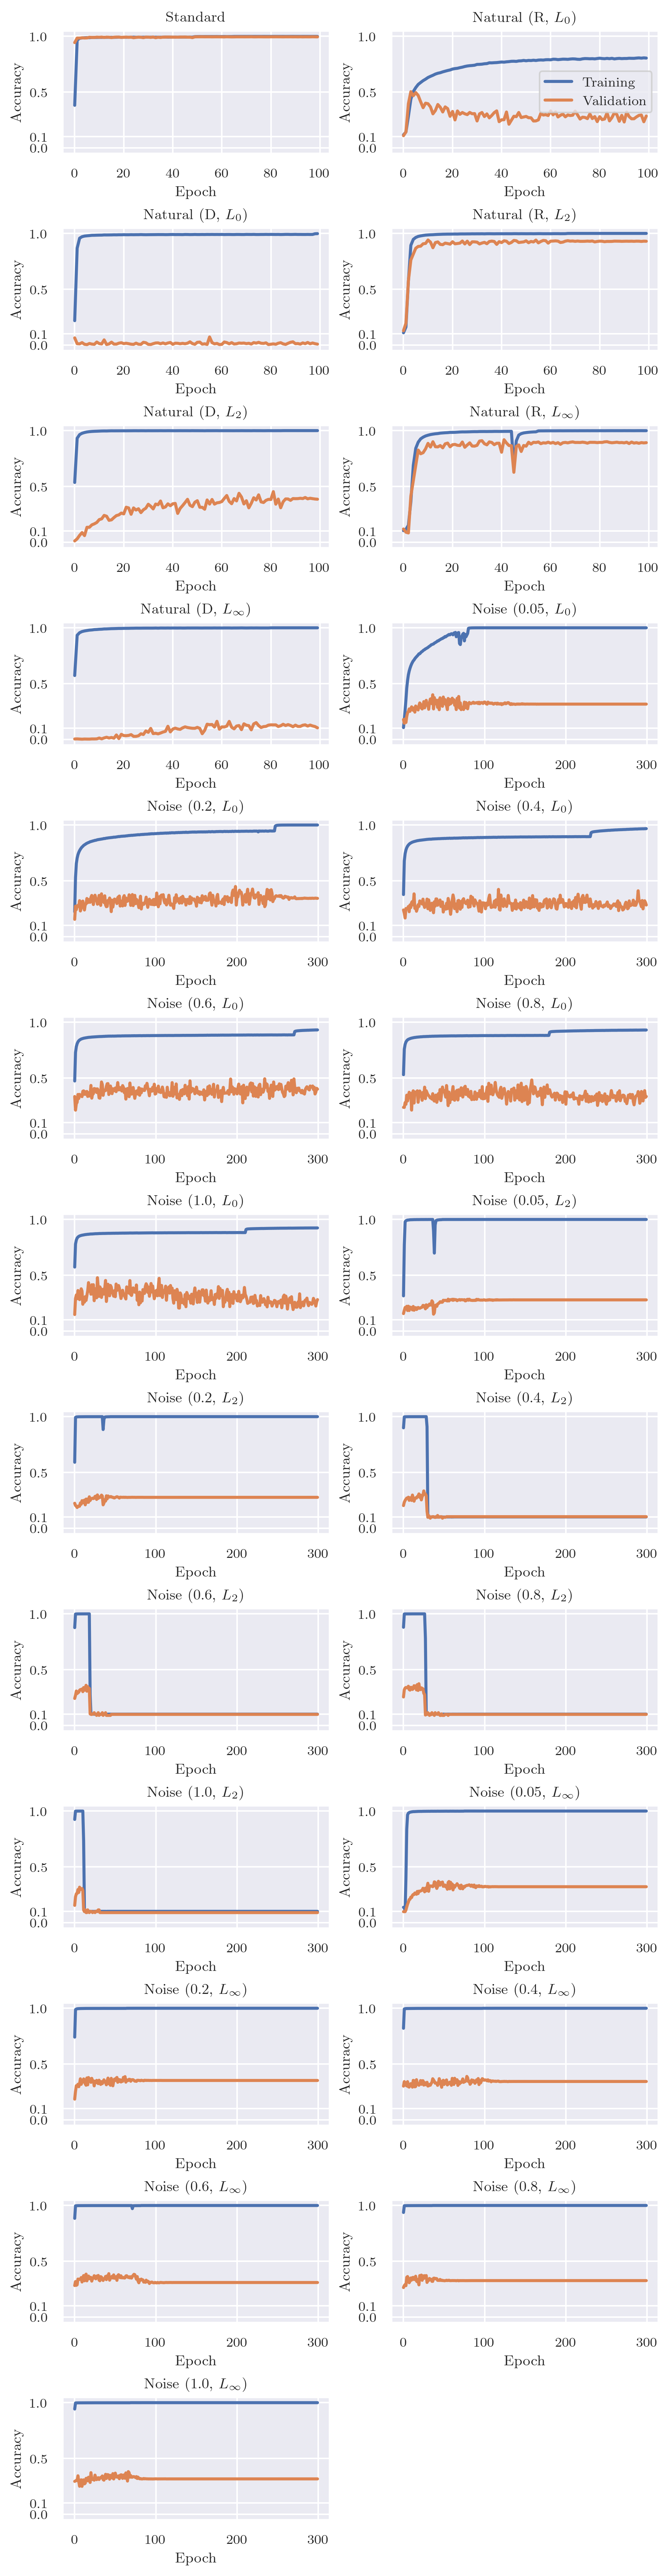

In [8]:
show_all(*get_names_and_labels('MNIST'))

# FMNIST

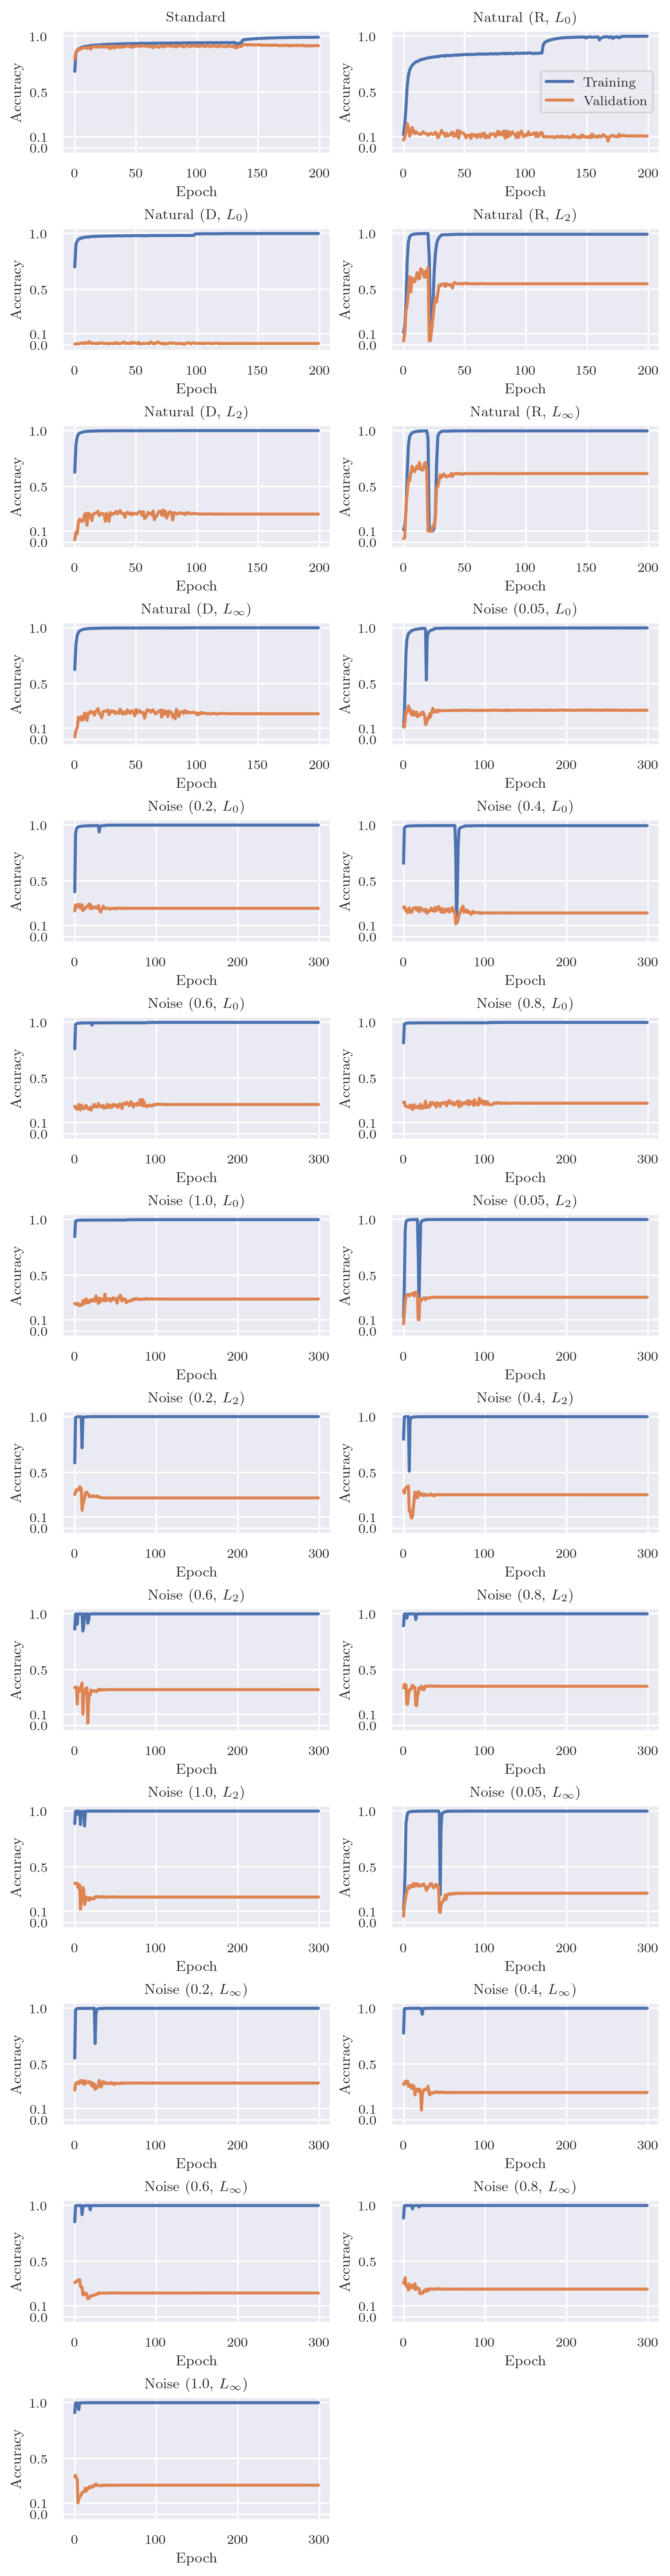

In [9]:
show_all(*get_names_and_labels('FMNIST'))

# MNIST & FMNIST

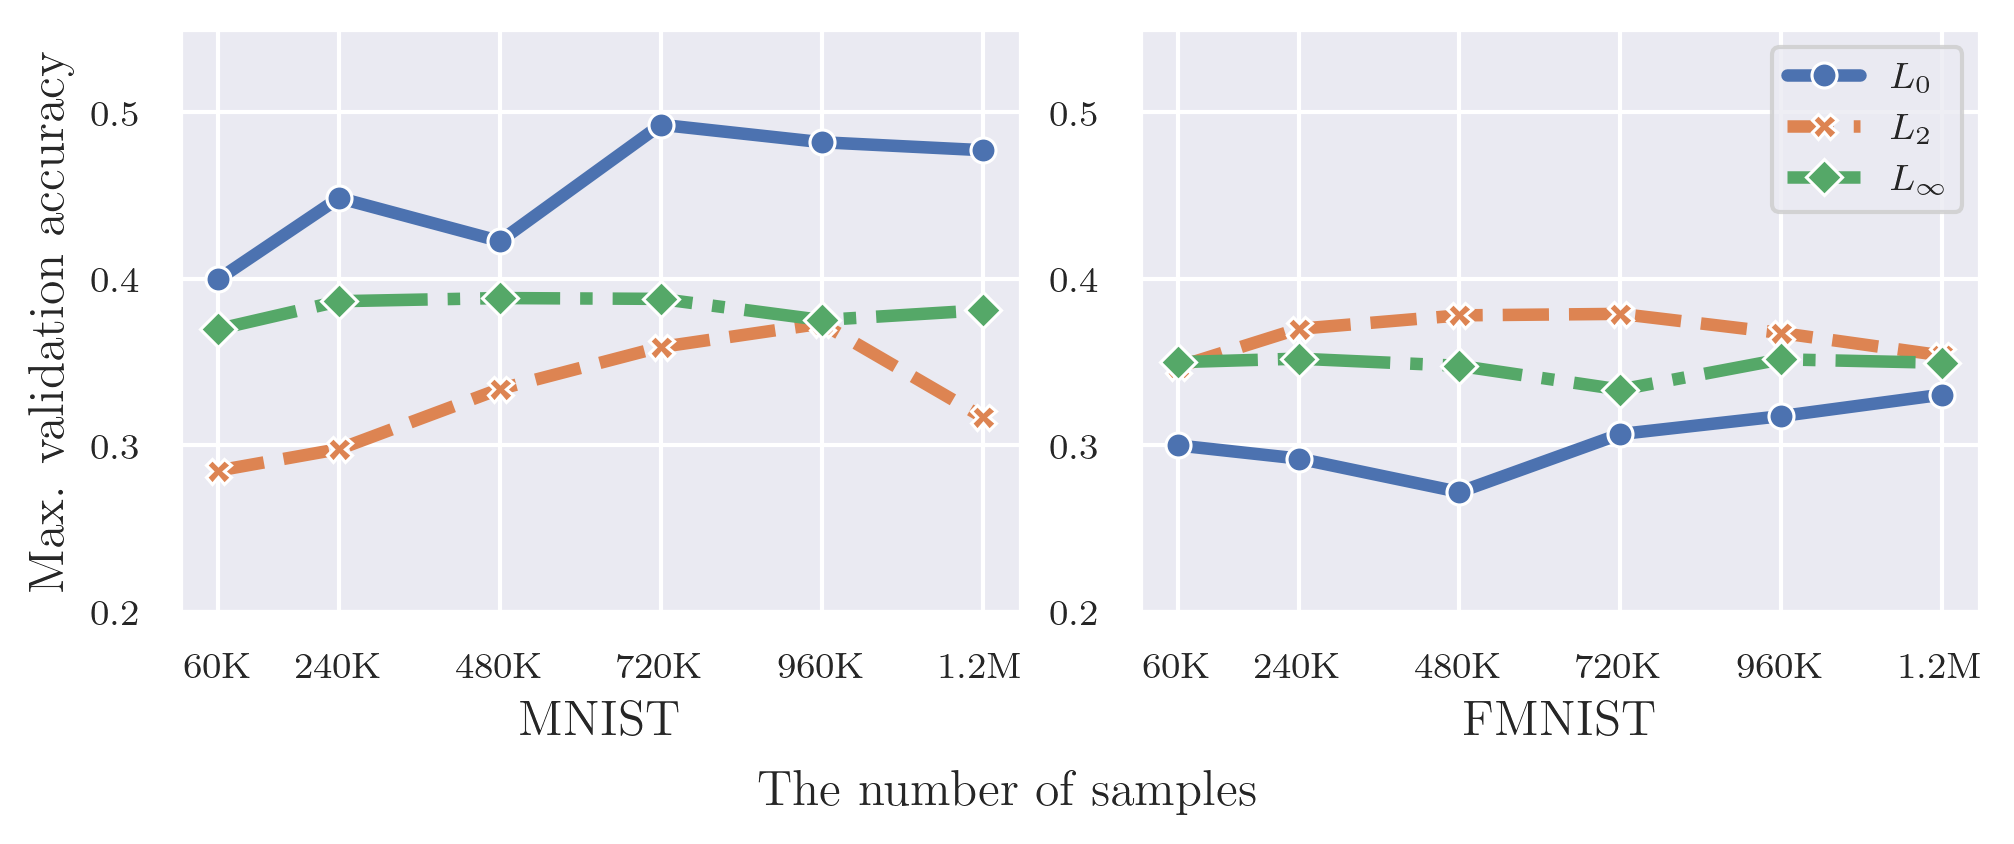

In [10]:
f = Figure(1, 2, (6.6, 2.7))

for i, dataset_name in enumerate(('MNIST', 'FMNIST')):
    ax = f.axes[0][i]

    for norm in ('L0', 'L2', 'Linf'):
        xs, ys = [], []
        for ratio in (0.05, 0.2, 0.4, 0.6, 0.8, 1.0):
            dname = f'{dataset_name}_uniform_{norm}_{ratio}'

            x = 1200000 * ratio
            y = max(read_acc(dname)[1])

            xs.append(x)
            ys.append(y)

        if norm == 'L0':
            ax.line(xs, ys, label=r'$L_0$', marker='o')
        elif norm == 'L2':
            ax.line(xs, ys, label=r'$L_2$', marker='X', linestyle='--')
        else:
            ax.line(xs, ys, label=r'$L_\infty$', marker='D', linestyle='dashdot')

        ax.set_xticks(xs)
        ax.set_xticklabels(['60K', '240K', '480K', '720K', '960K', '1.2M'])

        ax.set_ylim(0.2, 0.55)
        ax.set_yticks([0.2, 0.3, 0.4, 0.5])

    ax.set_xlabel(dataset_name, 12)

f.set_supxlabel('The number of samples', 12)
f.axes[0][0].set_ylabel('Max. validation accuracy', 12)
f.axes[0][0].remove_legend()

f.save(root, 'figs', 'practical_graphs_noise.pdf')
f.show()
f.close()

# CIFAR-10

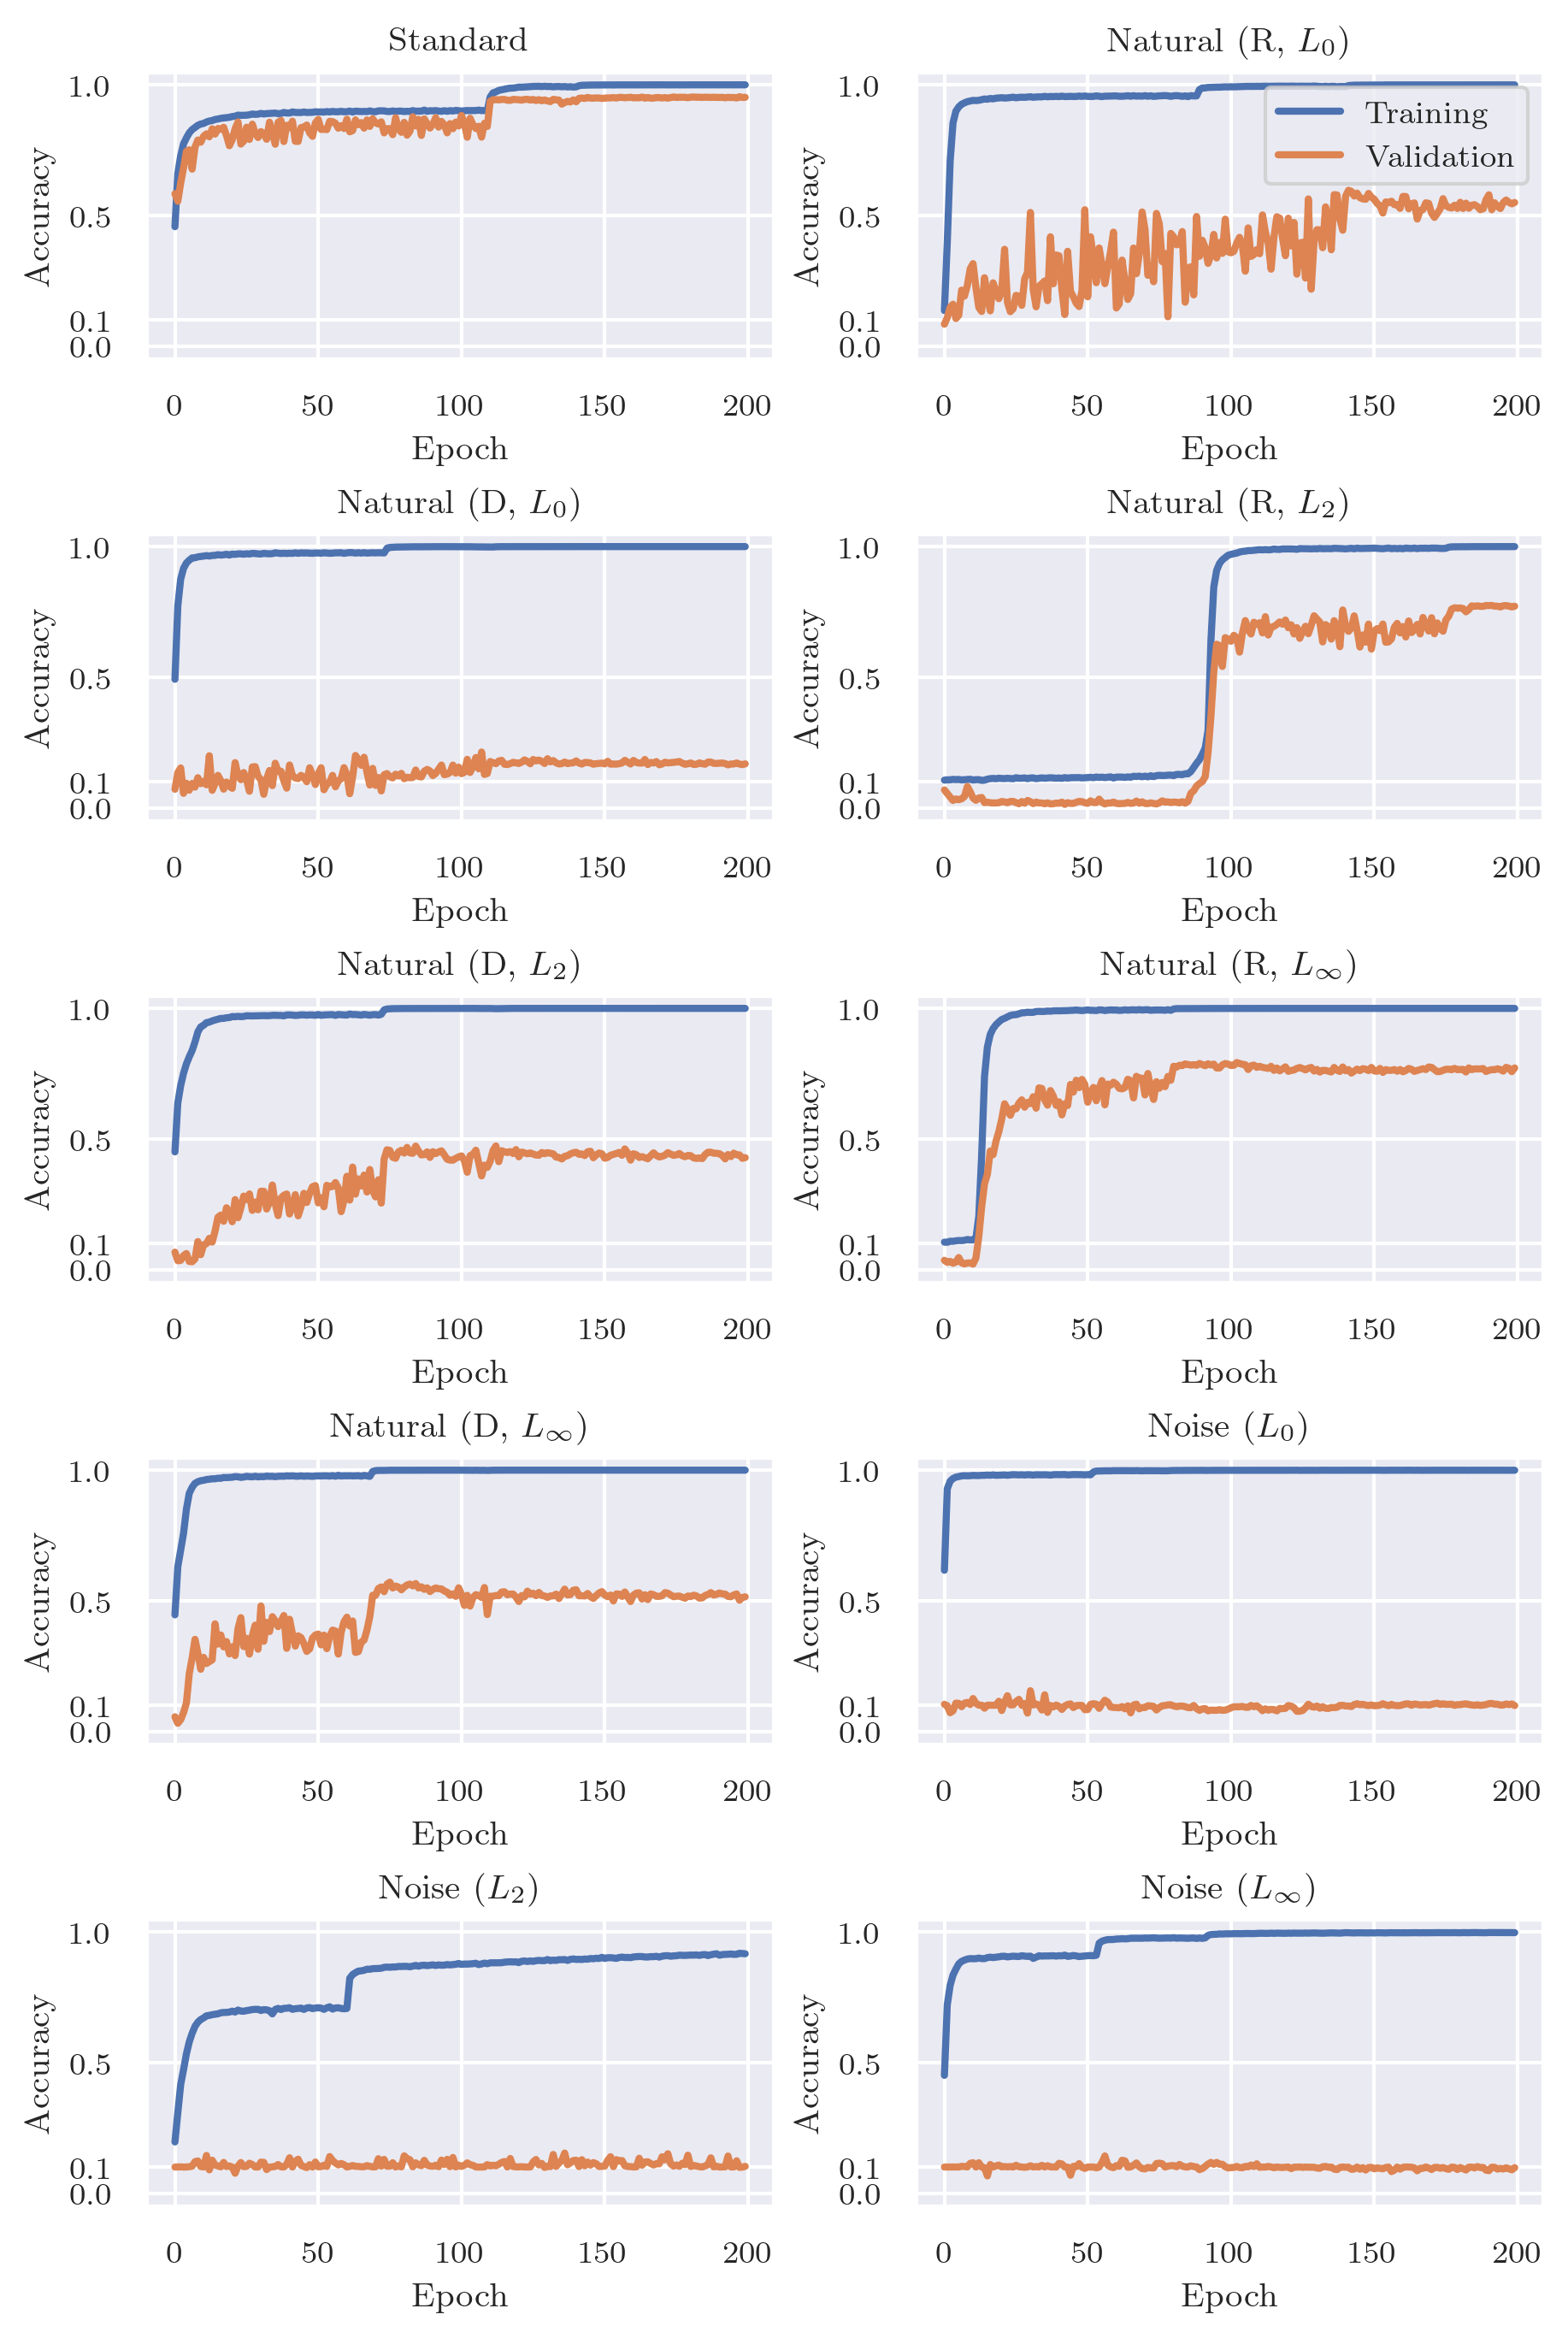

In [11]:
show_all(*get_names_and_labels('CIFAR10'))